In [1]:
from __future__ import print_function
__author__= 'mh5172'
import pylab as pl
import seaborn
from scipy.optimize import curve_fit, minimize
import numpy as np
import matplotlib.pyplot as plt
from scipy import asarray as ar,exp   
import matplotlib.mlab as mlab
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Chisq mean: 101.06, standard deviation: 15.83


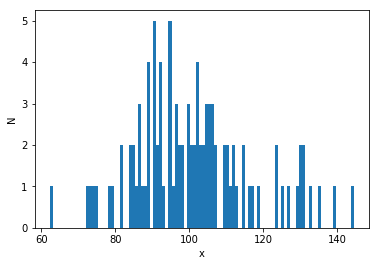

In [2]:
mymean = 100
md = {}
df = mymean
np.random.seed(25)
md['chisq'] = np.random.chisquare(df, size=100)
pl.hist(md['chisq'], bins =(len(md['chisq'])))
pl.ylabel('N')
pl.xlabel('x')
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

### Figure 1_1: Chi sq distribution: mean = 100, N=100

In [3]:
mysize = np.random.randint(10,2000,100)
print(mysize, mysize.shape)

[1980  576  943  694 1672   67 1474 1566 1814  738 1774 1995  496 1109
  731 1557  871  690  112  721 1832 1309  139  336   66  717  112  141
  698 1462  350 1743  691 1826 1188   39 1269 1678 1436  506 1466 1847
 1724  919 1202 1465  449   60  443 1500  807 1725 1790  654 1362  691
  164  665  558 1852 1119 1581  158 1727  938  467 1728 1382  848  809
 1150 1266 1347 1902 1402 1949 1091  522  486 1056 1819 1346  339 1032
 1910  235  329 1948 1422 1058 1775 1624 1485  438 1303 1805  721 1070
  812 1925] (100,)


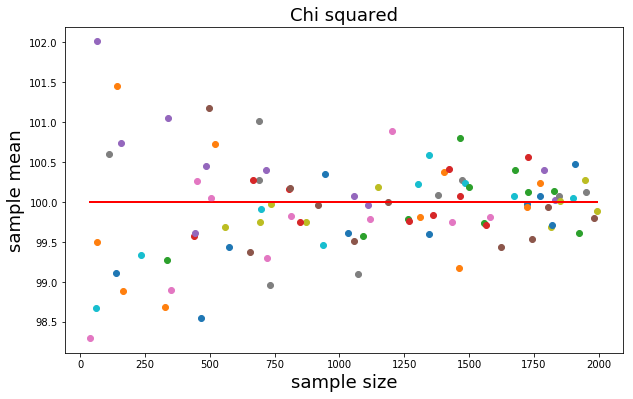

In [4]:
md['chisq'] = {} 
np.random.seed(25)
for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)#the key of the value(array) is the lenth of it
md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
for j in md['chisq']:
    if not type(j) == str:
        md['chisq']['means'][j] = md['chisq'][j].mean()
        axchisq_mu_n.plot(j, md['chisq']['means'][j], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([mysize.min(), mysize.max()], [df, df], 'r')

### Figure 1_2: 100 different size Chi sq distribution sample, the x-axis is the sample size, the y-axis is the sample mean. This plot shows that the larger sample's mean is more likely to close the mean I set before.  The sample mean obtained from a large number of trials are close to the expected value (100), and tend to become closer as more trials are performed.

Text(0,0.5,'N')

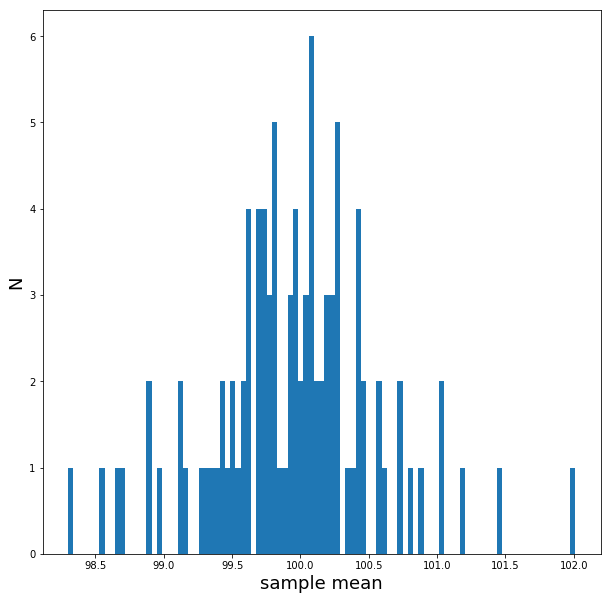

In [5]:
allmeans = list(md['chisq']['means'].values())
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=(len(allmeans)))
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure1_3: The x-axis is sample mean, and the y-axis is the amount of sample. From this plot, we can tell that roughly, when the mean closer to 100, the sample amount is greater.

## Gaussian Fit

/Users/hemingyi/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/hemingyi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  """


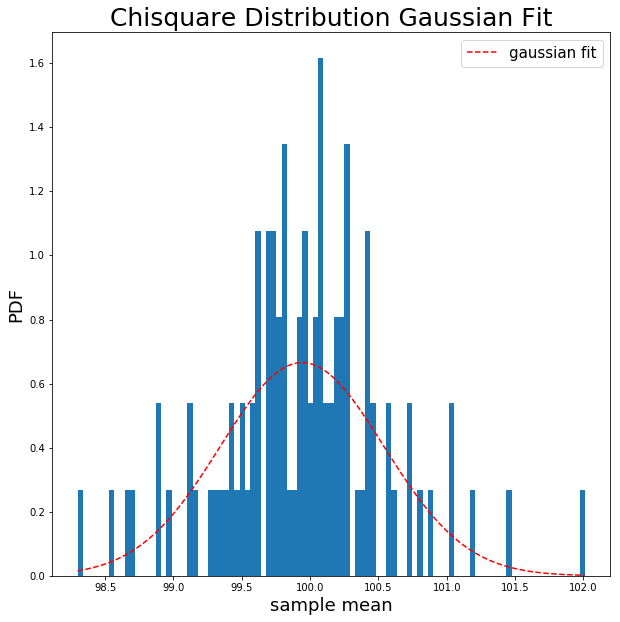

In [6]:
mu_chi = np.mean(allmeans)
std_chi = np.std(allmeans)
pl.figure(figsize=(10, 10))
n, bins, patches = pl.hist(allmeans,bins=(len(allmeans)),normed=1)
gaussian_fit_chi = mlab.normpdf(bins, mu_chi, std_chi)
pl.plot(bins, gaussian_fit_chi, 'r--',label='gaussian fit')
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('PDF', fontsize = 18)
pl.legend('gaussian')
pl.title('Chisquare Distribution Gaussian Fit', fontsize = 25)
pl.legend(fontsize=15)

### Figure1_4: This plot is the gaussian fit of all sample mean, it seems like obey the law of large numbers.

# Normal distribution

Normal mean: 99.48, standard deviation: 10.84


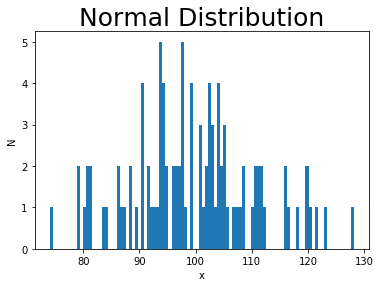

In [7]:
np.random.seed(25)
md['normal'] = np.random.normal(mymean,10,100)
pl.hist(md['normal'], bins = 100)
pl.ylabel('N')
pl.xlabel('x')
pl.title('Normal Distribution', fontsize = 25)
print ("Normal mean: %.2f, standard deviation: %.2f"%(md['normal'].mean(), md['normal'].std()))


### Figure 2_1: normal distribution: mean = 100, N=100

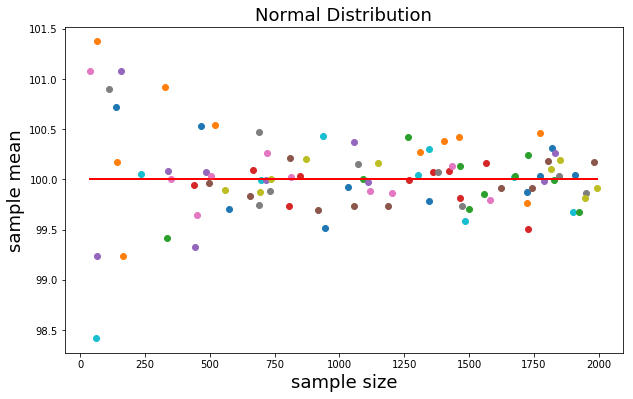

In [8]:
md['normal'] = {} 
for n in mysize:
    md['normal'][n] = np.random.normal(mymean,10,n)#the key of the value(array) is the lenth of it
md['normal']['means'] = {}
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
for j in md['normal']:
    if not type(j) == str:
        md['normal']['means'][j] = md['normal'][j].mean()
        axnormal_mu_n.plot(j, md['normal']['means'][j], 'o')
        axnormal_mu_n.set_xlabel('sample size', fontsize=18)
        axnormal_mu_n.set_ylabel('sample mean', fontsize=18)
        axnormal_mu_n.set_title('Normal Distribution', fontsize=18)
        axnormal_mu_n.plot([mysize.min(), mysize.max()], [mymean,mymean], 'r')

### Figure 2_2: 100 different size normal distribution sample, the x-axis is the sample size, the y-axis is the sample mean. This plot shows that the larger sample's mean is more likely to close the mean I set before.  The sample mean obtained from a large number of trials are close to the expected value (100), and tend to become closer as more trials are performed.

Text(0.5,1,'Mean of 100 different size Normal Distribution')

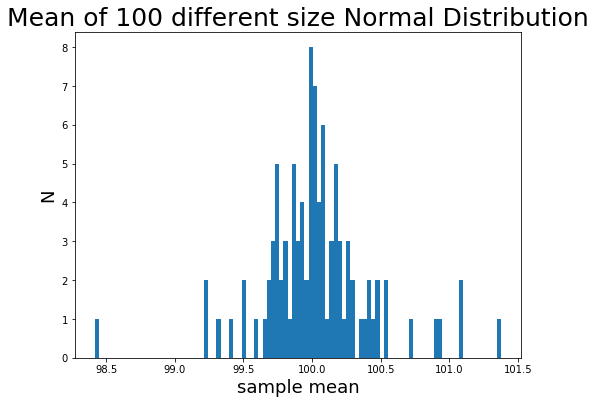

In [9]:
allmeans_normal = list(md['normal']['means'].values())
pl.figure(figsize=(8, 6))
pl.hist(allmeans_normal,bins=(len(allmeans_normal)))
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Mean of 100 different size Normal Distribution', fontsize = 25)

### Figure2_3: The x-axis is sample mean, and the y-axis is the amount of sample. From this plot, we can tell that roughly, when the mean closer to 100, the sample amount is greater.

/Users/hemingyi/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/hemingyi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  """


Text(0.5,1,'Mean of 100 different size Normal Distribution')

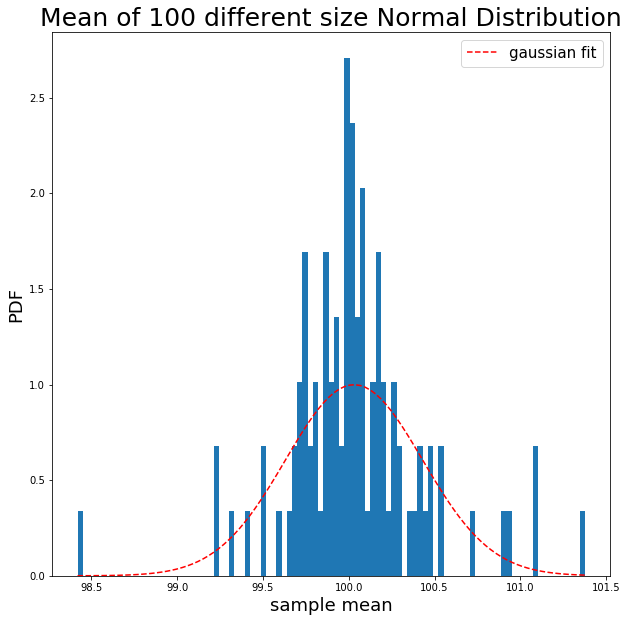

In [10]:
mu_norm = np.mean(allmeans_normal)
std_norm = np.std(allmeans_normal)
pl.figure(figsize=(10, 10))
n, bins, patches = pl.hist(allmeans_normal,bins=(len(allmeans_normal)),normed=1)
gaussian_fit_norm = mlab.normpdf(bins, mu_norm, std_norm)
pl.plot(bins, gaussian_fit_norm, 'r--',label='gaussian fit')
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('PDF', fontsize = 18)
pl.legend(fontsize=15)
pl.title('Mean of 100 different size Normal Distribution', fontsize = 25)

### Figure2_4: This plot is the gaussian fit of all sample mean, it seems like obet the law of large numbers.

# Poisson Distribution

poisson mean: 97.79, standard deviation: 8.98


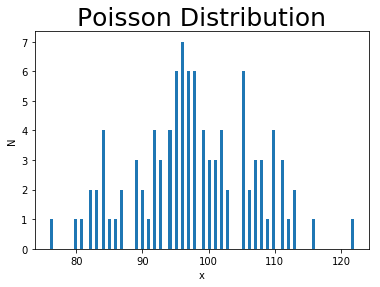

In [11]:
np.random.seed(25)
md['poisson'] = np.random.poisson(mymean,100)
pl.hist(md['poisson'], bins = (len(md['poisson'])))
pl.ylabel('N')
pl.xlabel('x')
pl.title('Poisson Distribution', fontsize = 25)
print ("poisson mean: %.2f, standard deviation: %.2f"%(md['poisson'].mean(), md['poisson'].std()))

### Figure 3_1: Poisson distribution: mean = 100, N=100

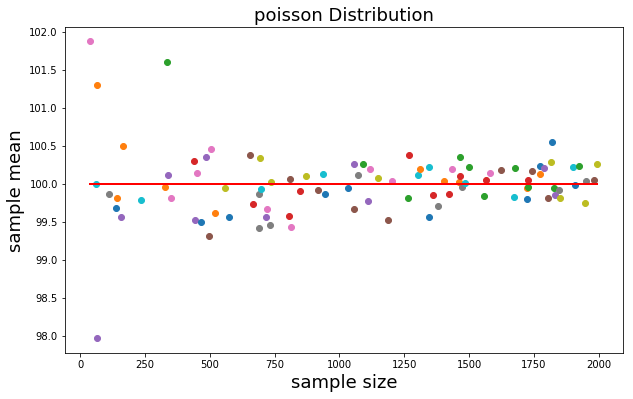

In [12]:
md['poisson'] = {} 
for n in mysize:
    md['poisson'][n] = np.random.poisson(mymean,n)#the key of the value(array) is the lenth of it
md['poisson']['means'] = {}
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
for j in md['poisson']:
    if not type(j) == str:
        md['poisson']['means'][j] = md['poisson'][j].mean()
        axnormal_mu_n.plot(j, md['poisson']['means'][j], 'o')
        axnormal_mu_n.set_xlabel('sample size', fontsize=18)
        axnormal_mu_n.set_ylabel('sample mean', fontsize=18)
        axnormal_mu_n.set_title('poisson Distribution', fontsize=18)
        axnormal_mu_n.plot([mysize.min(), mysize.max()], [mymean,mymean], 'r')

### Figure 3_2: 100 different size poisson distribution sample, the x-axis is the sample size, the y-axis is the sample mean. This plot shows that the larger sample's mean is more likely to close the mean I set before.  The sample mean obtained from a large number of trials are close to the expected value (100), and tend to become closer as more trials are performed.

Text(0.5,1,'Mean of 100 different size Poisson Distribution')

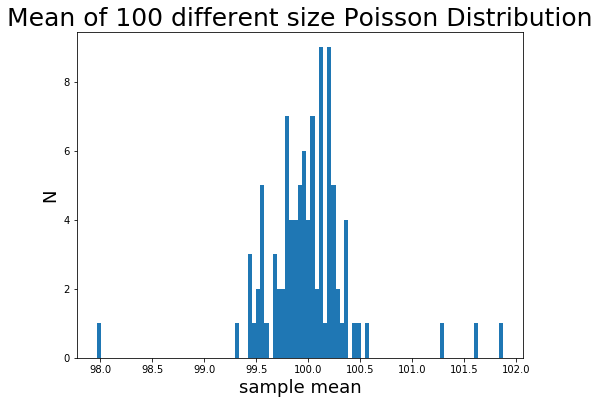

In [13]:
allmeans_poisson = list(md['poisson']['means'].values())
pl.figure(figsize=(8, 6))
pl.hist(allmeans_poisson,bins=(len(allmeans_poisson)))
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Mean of 100 different size Poisson Distribution', fontsize = 25)

### Figure3_3: The x-axis is sample mean, and the y-axis is the amount of sample. From this plot, we can tell that roughly, when the mean closer to 100, the sample amount is greater.

/Users/hemingyi/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/hemingyi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  """


Text(0.5,1,'Mean of 100 different size Poisson Distribution')

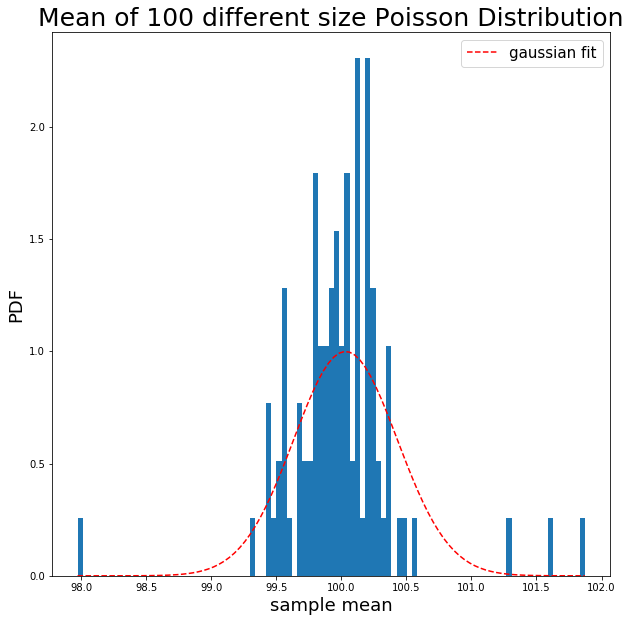

In [14]:
mu_poisson = np.mean(allmeans_poisson)
std_poisson = np.std(allmeans_poisson)
pl.figure(figsize=(10, 10))
n, bins, patches = pl.hist(allmeans_poisson,bins=(len(allmeans_poisson)),normed=1)
gaussian_fit_poisson = mlab.normpdf(bins, mu_norm, std_norm)
pl.plot(bins, gaussian_fit_poisson, 'r--',label='gaussian fit')
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('PDF', fontsize = 18)
pl.legend(fontsize=15)
pl.title('Mean of 100 different size Poisson Distribution', fontsize = 25)

### Figure3_4: This plot is the gaussian fit of all sample mean, it seems like obey the law of large numbers.


# Binomial distribution

binomial mean: 100.21, standard deviation: 8.27


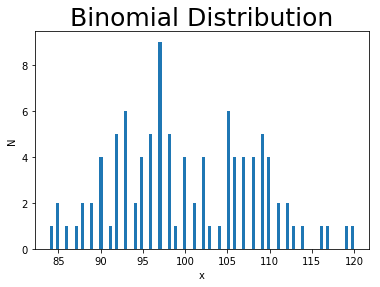

In [15]:
np.random.seed(25)
md['binomial'] = np.random.binomial(500,0.2,100)
pl.hist(md['binomial'], bins = (len(md['poisson'])))
pl.ylabel('N')
pl.xlabel('x')
pl.title('Binomial Distribution', fontsize = 25)
print ("binomial mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))

### Figure 4_1: Binomial distribution: mean = 100, N=100

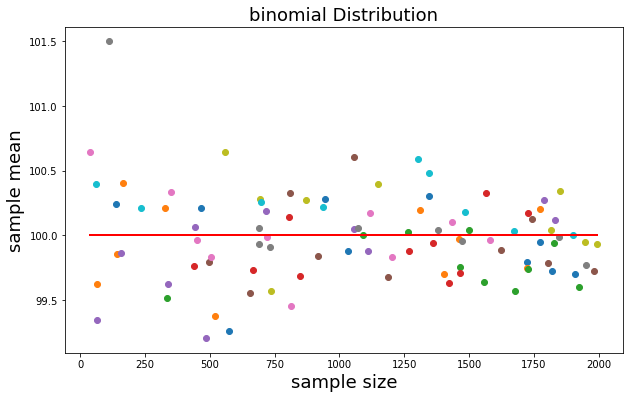

In [16]:
md['binomial'] = {} 
for n in mysize:
    md['binomial'][n] = np.random.binomial(500,0.2,n)#the key of the value(array) is the lenth of it
md['binomial']['means'] = {}
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
for j in md['binomial']:
    if not type(j) == str:
        md['binomial']['means'][j] = md['binomial'][j].mean()
        axnormal_mu_n.plot(j, md['binomial']['means'][j], 'o')
        axnormal_mu_n.set_xlabel('sample size', fontsize=18)
        axnormal_mu_n.set_ylabel('sample mean', fontsize=18)
        axnormal_mu_n.set_title('binomial Distribution', fontsize=18)
        axnormal_mu_n.plot([mysize.min(), mysize.max()], [100,100], 'r')

### Figure 4_2: 100 different size binomial distribution sample, the x-axis is the sample size, the y-axis is the sample mean. This plot shows that the larger sample's mean is more likely to close the mean I set before.  The sample mean obtained from a large number of trials are close to the expected value (100), and tend to become closer as more trials are performed.

Text(0.5,1,'Mean of 100 different size Binomial Distribution')

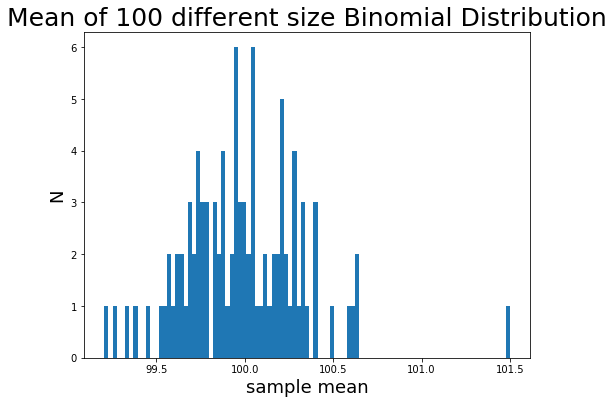

In [17]:
allmeans_binomial = list(md['binomial']['means'].values())
pl.figure(figsize=(8, 6))
pl.hist(allmeans_binomial,bins=len(allmeans_binomial))
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Mean of 100 different size Binomial Distribution', fontsize = 25)

### Figure 4_3:  The x-axis is sample mean, and the y-axis is the amount of sample. From this plot, we can tell that roughly, when the mean closer to 100, the sample amount is greater.

/Users/hemingyi/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/hemingyi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  """


Text(0.5,1,'Mean of 100 different size Binomial Distribution')

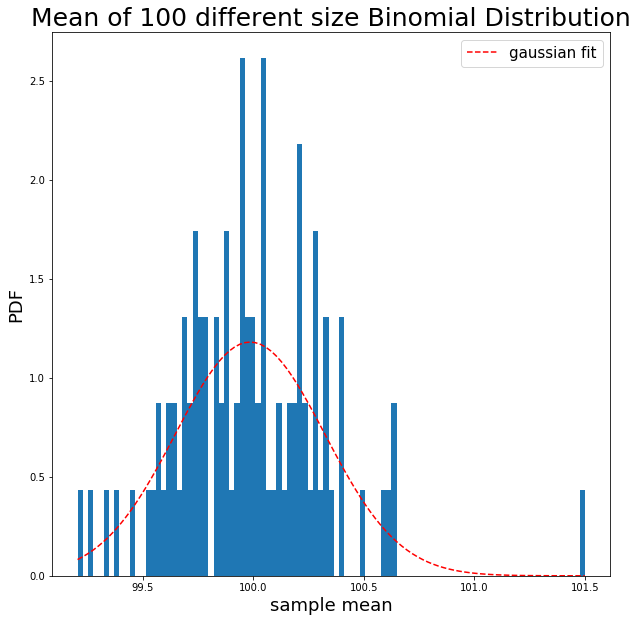

In [18]:
mu_binomial = np.mean(allmeans_binomial)
std_binomial = np.std(allmeans_binomial)
pl.figure(figsize=(10, 10))
n, bins, patches = pl.hist(allmeans_binomial,bins=(len(allmeans_binomial)),normed=1)
gaussian_fit_binomial = mlab.normpdf(bins, mu_binomial, std_binomial)
pl.plot(bins, gaussian_fit_binomial, 'r--',label='gaussian fit')
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('PDF', fontsize = 18)
pl.legend(fontsize=15)
pl.title('Mean of 100 different size Binomial Distribution', fontsize = 25)

### Figure 4_4: This plot is the gaussian fit of all sample mean, it seems like obey the law of large numbers.

# lognoraml distribution

lnormal mean: 105.65, standard deviation: 147.78


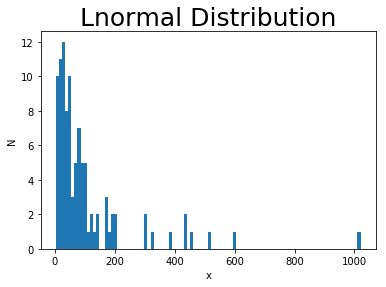

In [19]:
np.random.seed(25)
md['lnormal'] = np.random.lognormal((np.log(mymean)-0.5),1,100)
pl.hist(md['lnormal'], bins = (len(md['lnormal'])))
pl.ylabel('N')
pl.xlabel('x')
pl.title('Lnormal Distribution', fontsize = 25)
print ("lnormal mean: %.2f, standard deviation: %.2f"%(md['lnormal'].mean(), md['lnormal'].std()))

### Figure 5_1: Lognormal distribution: mean = 100, N=100

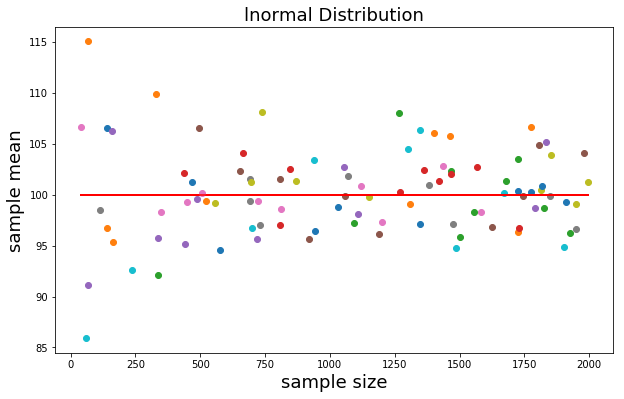

In [20]:
md['lnormal'] = {} 
for n in mysize:
    md['lnormal'][n] = np.random.lognormal((np.log(mymean)-0.5),1,n)#the key of the value(array) is the lenth of it
md['lnormal']['means'] = {}
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
for j in md['lnormal']:
    if not type(j) == str:
        md['lnormal']['means'][j] = md['lnormal'][j].mean()
        axnormal_mu_n.plot(j, md['lnormal']['means'][j], 'o')
        axnormal_mu_n.set_xlabel('sample size', fontsize=18)
        axnormal_mu_n.set_ylabel('sample mean', fontsize=18)
        axnormal_mu_n.set_title('lnormal Distribution', fontsize=18)
        axnormal_mu_n.plot([mysize.min(), mysize.max()], [100,100], 'r')

### Figure 5_2: 100 different size lognormal distribution sample, the x-axis is the sample size, the y-axis is the sample mean. This plot shows that the larger sample's mean is more likely to close the mean I set before.  The sample mean obtained from a large number of trials are close to the expected value (100), and tend to become closer as more trials are performed.

Text(0.5,1,'Mean of 100 different size Lnormal Distribution')

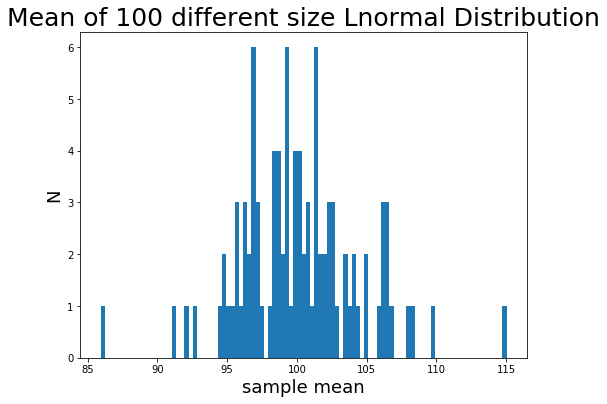

In [21]:
allmeans_lnormal = list(md['lnormal']['means'].values())
pl.figure(figsize=(8, 6))
pl.hist(allmeans_lnormal,bins=len(allmeans_lnormal))
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Mean of 100 different size Lnormal Distribution', fontsize = 25)

### Figure 5_3: The x-axis is sample mean, and the y-axis is the amount of sample. From this plot, we can tell that roughly, when the mean closer to 100, the sample amount is greater.

/Users/hemingyi/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/hemingyi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  """


Text(0.5,1,'Mean of 100 different size Lnormal Distribution')

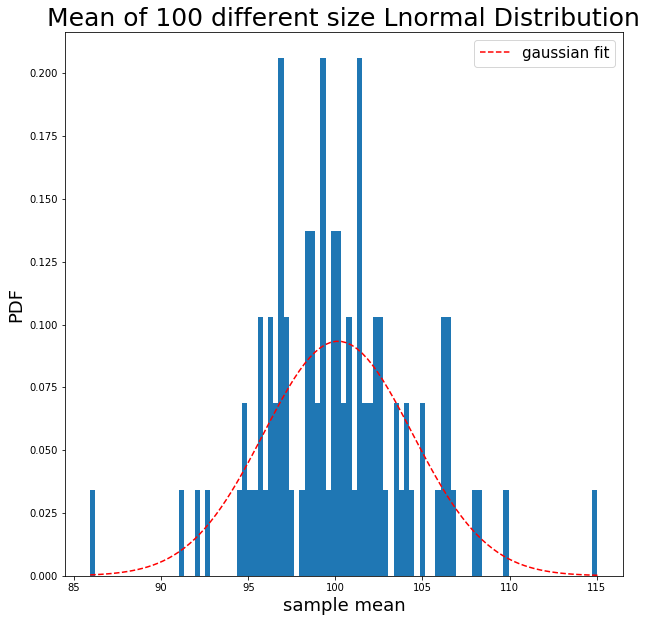

In [22]:
mu_lnormal = np.mean(allmeans_lnormal)
std_lnormal = np.std(allmeans_lnormal)
pl.figure(figsize=(10, 10))
n, bins, patches = pl.hist(allmeans_lnormal,bins=(len(allmeans_lnormal)),normed=1)
gaussian_fit_lnormal = mlab.normpdf(bins, mu_lnormal, std_lnormal)
pl.plot(bins, gaussian_fit_lnormal, 'r--',label='gaussian fit')
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('PDF', fontsize = 18)
pl.legend(fontsize=15)
pl.title('Mean of 100 different size Lnormal Distribution', fontsize = 25)

### Figure 5_4: This plot is the gaussian fit of all sample mean, it seems like obey the law of large numbers.

## Plot all distributions

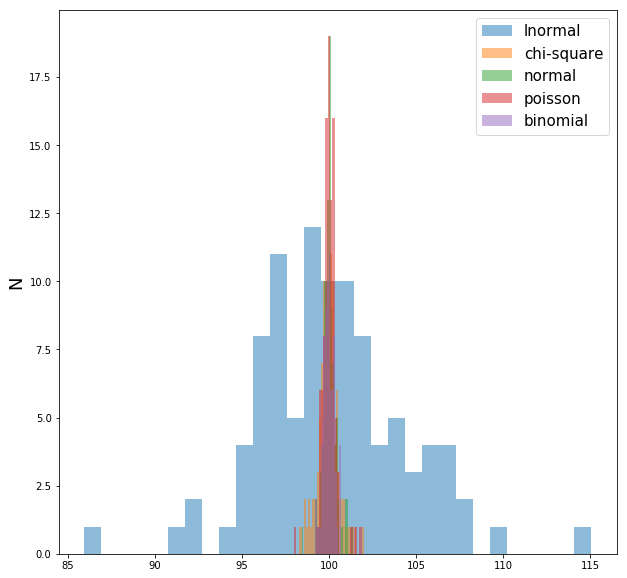

In [23]:
pl.figure(figsize=(10, 10))
pl.hist(allmeans_lnormal,bins=30,alpha=0.5,label='lnormal')
pl.hist(allmeans,bins=30,alpha=0.5,label='chi-square')
pl.hist(allmeans_normal,bins=30,alpha=0.5,label='normal')
pl.hist(allmeans_poisson,bins=30,alpha=0.5,label='poisson')
pl.hist(allmeans_binomial,bins=30,alpha=0.5,label='binomial')
pl.ylabel('N', fontsize = 18)
pl.legend(fontsize=15)




In [24]:
all_means = []
all_means.append(allmeans)
all_means.append(allmeans_binomial)
all_means.append(allmeans_lnormal)
all_means.append(allmeans_normal)
all_means.append(allmeans_poisson)

/Users/hemingyi/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/hemingyi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


Text(0.5,1,'Mean of all Distributions')

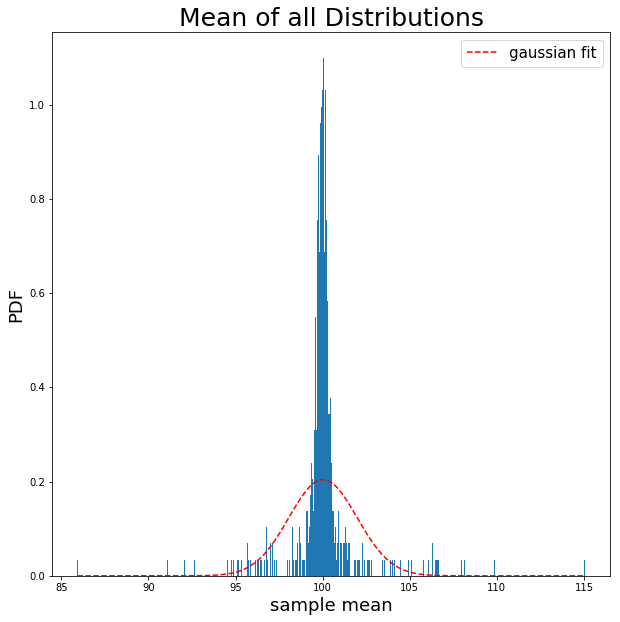

In [25]:
myList = [x for j in all_means for x in j]
mu_all = np.mean(myList)
std_all = np.std(myList)
pl.figure(figsize=(10, 10))
n, bins, patches = pl.hist(myList,bins=(len(myList)),normed=1)
gaussian_fit_all_means = mlab.normpdf(bins, mu_all, std_all)
pl.plot(bins, gaussian_fit_all_means, 'r--',label='gaussian fit')
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('PDF', fontsize = 18)
pl.legend(fontsize=15)
pl.title('Mean of all Distributions', fontsize = 25)